<a href="https://colab.research.google.com/github/krishnareddyalavala/Data-Science-models/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving download (1).jpeg to download (1) (2).jpeg


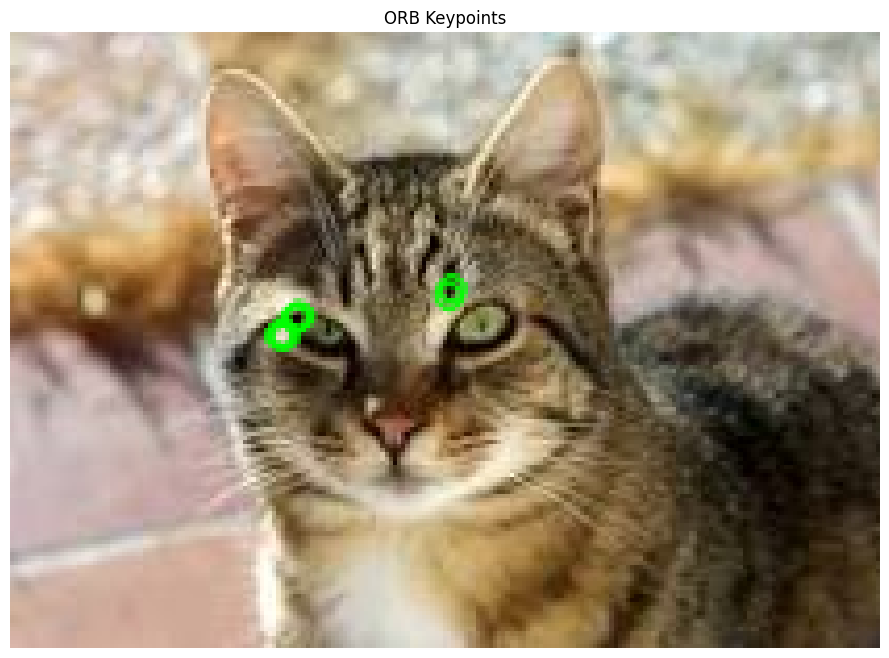

In [5]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
import urllib.request
import numpy as np
##resp = urllib.request.urlopen(image)
#image = np.asarray(bytearray(image.read()), dtype="uint8")
#image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Step 2: Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Initialize ORB Detectorin
orb = cv2.ORB_create(nfeatures=10)

# Step 4: Detect Keypoints and Compute Descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Step 5: Draw Keypoints on Image
keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Step 6: Display Image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoints")
plt.axis("off")
plt.show()

In [6]:
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

Number of keypoints detected: 8
Descriptor shape: (8, 32)


In [7]:
sift = cv2.SIFT_create()

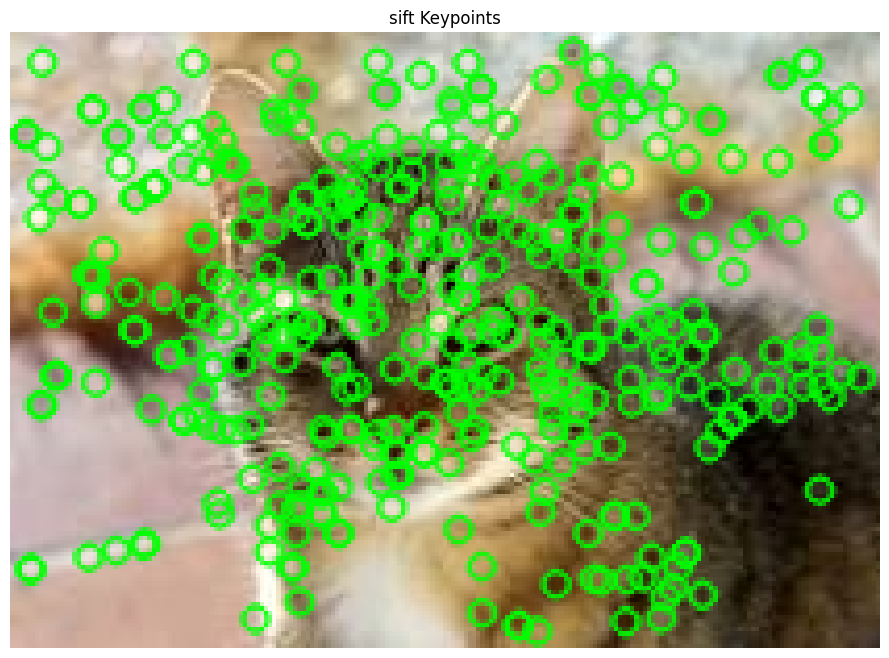

In [8]:
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Step 5: Draw Keypnts on Image
keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Step 6: Display Image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB))
plt.title("sift Keypoints")
plt.axis("off")
plt.show()

In [9]:
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

Number of keypoints detected: 384
Descriptor shape: (384, 128)


In [10]:
brisk = cv2.BRISK_create()

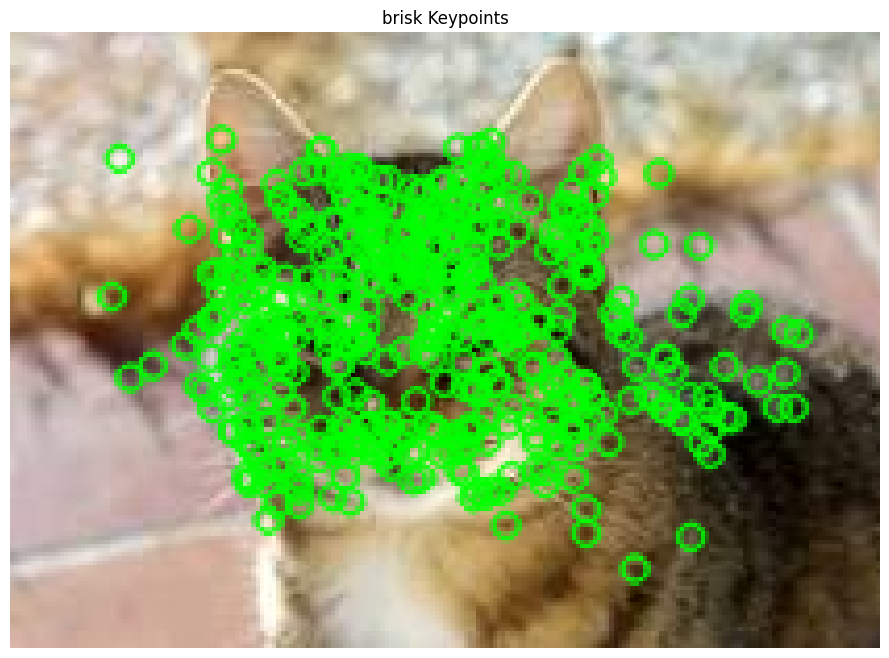

In [11]:
keypoints, descriptors = brisk.detectAndCompute(gray, None)

# Step 5: Draw Keypnts on Image
keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Step 6: Display Image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB))
plt.title("brisk Keypoints")
plt.axis("off")
plt.show()

In [12]:
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

Number of keypoints detected: 443
Descriptor shape: (443, 64)


In [13]:
akaze = cv2.AKAZE_create()

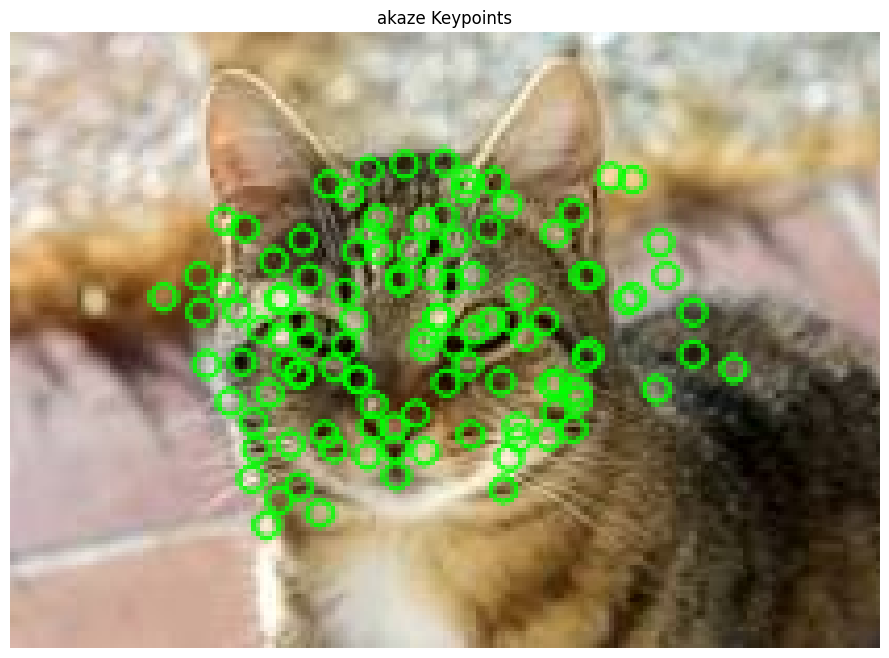

In [14]:
keypoints, descriptors = akaze.detectAndCompute(gray, None)

# Step 5: Draw Keypnts on Image
keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Step 6: Display Image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB))
plt.title("akaze Keypoints")
plt.axis("off")
plt.show()

In [15]:
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

Number of keypoints detected: 113
Descriptor shape: (113, 61)


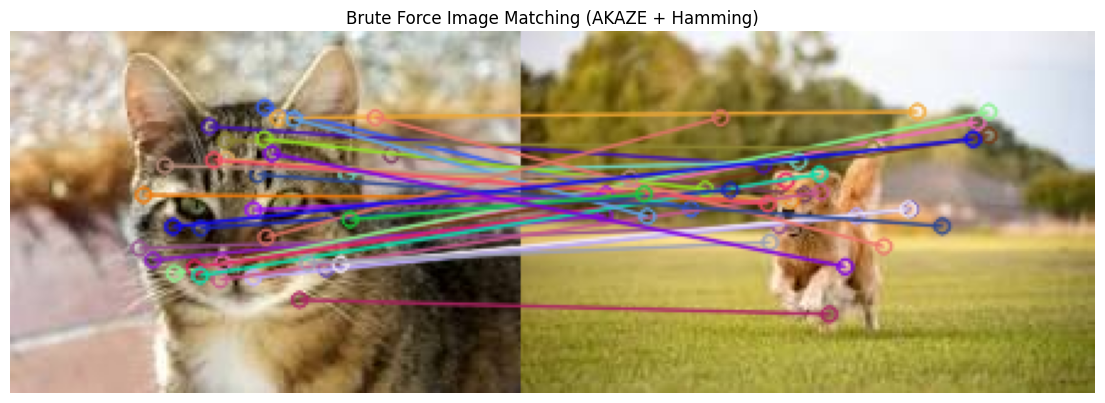

Keypoints in Image 1: 113
Keypoints in Image 2: 76
Total Matches Found: 33


In [2]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read images from local path
img1 = cv2.imread("/content/download (1).jpeg")
img2 = cv2.imread("/content/images (1).jpeg")

# Check if images loaded properly
if img1 is None or img2 is None:
    print(" Error loading images. Check file paths.")
    exit()

# Step 2: Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 3: Initialize AKAZE feature detector
akaze = cv2.AKAZE_create()

# Step 4: Detect keypoints and descriptors
kp1, des1 = akaze.detectAndCompute(gray1, None)
kp2, des2 = akaze.detectAndCompute(gray2, None)

# Step 5: Create Brute-Force Matcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Step 6: Match descriptors
matches = bf.match(des1, des2)

# Step 7: Sort matches based on distance (lower is better)
matches = sorted(matches, key=lambda x: x.distance)

# Step 8: Draw top 50 matches
matched_image = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:50],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Step 9: Display result
plt.figure(figsize=(14, 8))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Brute Force Image Matching (AKAZE + Hamming)")
plt.axis("off")
plt.show()

# Step 10: Print info
print("Keypoints in Image 1:", len(kp1))
print("Keypoints in Image 2:", len(kp2))
print("Total Matches Found:", len(matches))

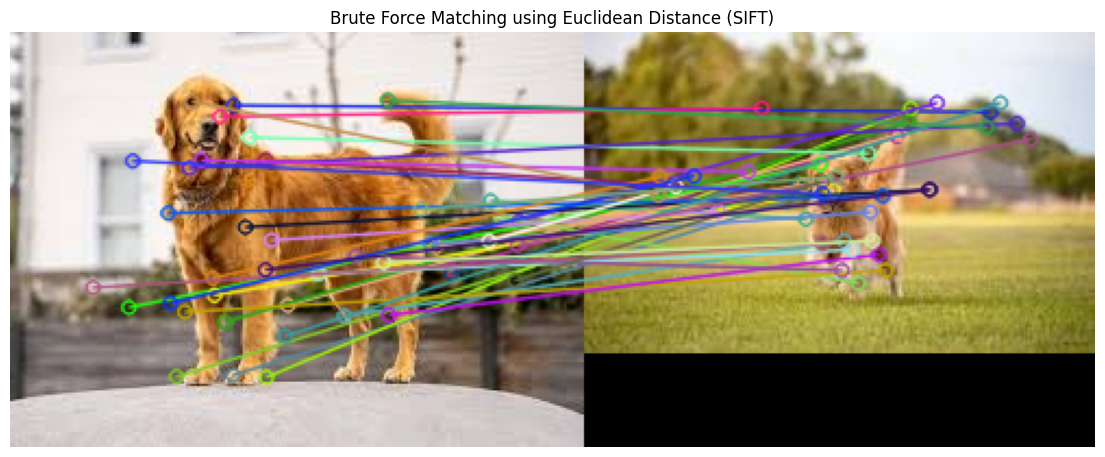

Keypoints in Image 1: 222
Keypoints in Image 2: 76
Total Matches: 41
Best match Euclidean distance: 534.55029296875


In [4]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load two images
img1 = cv2.imread("/content/images.jpeg")
img2 = cv2.imread("/content/images (1).jpeg")

if img1 is None or img2 is None:
    print("Error: Images not found")
    exit()

# Step 2: Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 3: Initialize SIFT (floating-point descriptor)
sift = cv2.AKAZE_create()

# Step 4: Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Step 5: Create Brute Force Matcher using EUCLIDEAN distance
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Step 6: Match descriptors
matches = bf.match(des1, des2)

# Step 7: Sort matches based on Euclidean distance
matches = sorted(matches, key=lambda x: x.distance)

# Step 8: Draw top matches
matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:50],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Step 9: Display output
plt.figure(figsize=(14, 8))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("Brute Force Matching using Euclidean Distance (SIFT)")
plt.axis("off")
plt.show()

# Step 10: Print matching information
print("Keypoints in Image 1:", len(kp1))
print("Keypoints in Image 2:", len(kp2))
print("Total Matches:", len(matches))
print("Best match Euclidean distance:", matches[0].distance)

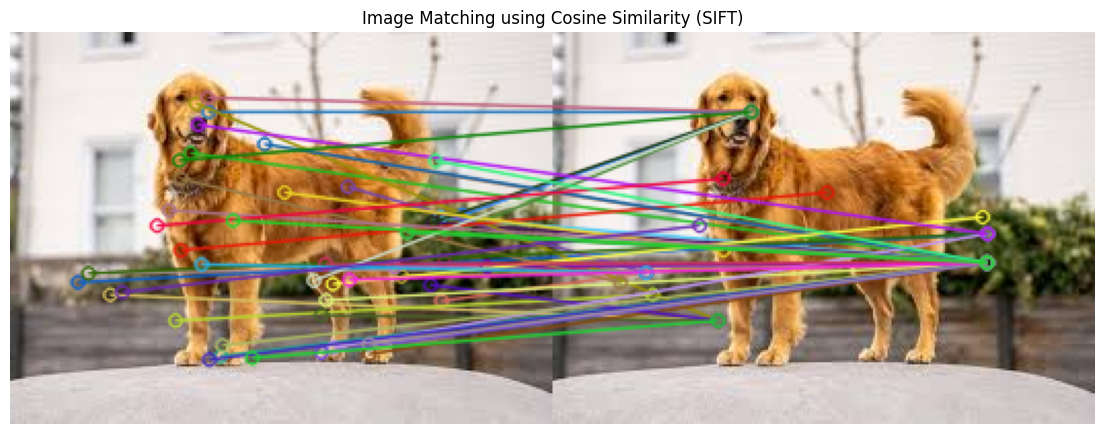

Keypoints in Image 1: 222
Keypoints in Image 2: 222
Total Matches: 222
Best cosine similarity: 0.0004495978355407715


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load images
img1 = cv2.imread("/content/images.jpeg")
img2 = cv2.imread("/content/images.jpeg")

if img1 is None or img2 is None:
    print("Error loading images")
    exit()

# Step 2: Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 3: Initialize SIFT
sift = cv2.AKAZE_create()

# Step 4: Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Step 5: Define Cosine Similarity function
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Step 6: Compute cosine similarity between all descriptors
matches = []

for i, d1 in enumerate(des1):
    best_score = -1
    best_j = -1
    for j, d2 in enumerate(des2):
        score = cosine_similarity(d1, d2)
        if score > best_score:
            best_score = score
            best_j = j

    # Create a DMatch object
    match = cv2.DMatch(_queryIdx=i, _trainIdx=best_j, _distance=1 - best_score)
    matches.append(match)

# Step 7: Sort matches by similarity (higher similarity = lower distance)
matches = sorted(matches, key=lambda x: x.distance)

# Step 8: Draw top matches
matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:50],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Step 9: Display result
plt.figure(figsize=(14, 8))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("Image Matching using Cosine Similarity (SIFT)")
plt.axis("off")
plt.show()

# Step 10: Print info
print("Keypoints in Image 1:", len(kp1))
print("Keypoints in Image 2:", len(kp2))
print("Total Matches:", len(matches))
print("Best cosine similarity:", 1 - matches[0].distance)